## Полиноминальная регрессия

Что если некоторые признаки работают в только в совокупности?

PolymialFeatures - метод который увеличивает наборы признаков

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image, display
import re

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Pet project - Laptop Price and Specification/laptop_clean_and_fill.csv')

In [4]:
df.sample()

,Unnamed: 0,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty_years,Brand,Ram_numeric,Ram_value,Diagonal,SSD_value,CPU_cores,CPU_threads
390,390,Lenovo IdeaPad Gaming 3 15IHU6 82K101R9IN Lapt...,715.9,63.0,11th Gen Intel Core i5 11320H,"Quad Core, 8 Threads",8 GB DDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",4 GB NVIDIA GeForce RTX 2050,Windows 11 OS,1,Lenovo,8,GB,15.6,512,4.0,8.0


In [5]:
df = df.drop('Unnamed: 0', axis =1)

In [20]:
X = df[['Ram_numeric', 'CPU_cores', 'CPU_threads']]
y = df['Price']

Создаем экземпляр и вызываем метод fit

In [21]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [9]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [10]:
poly_features = polynomial_converter.transform(X)

In [11]:
# получили 9 признаков - из которых первые 3 исходные, следующие 3 слагаемые itterection terms(?), последние 3 квадраты признаков
poly_features[:3]

array([[  8.,   6.,  12.,  64.,  48.,  96.,  36.,  72., 144.],
       [  8.,   2.,   4.,  64.,  16.,  32.,   4.,   8.,  16.],
       [  8.,   4.,   8.,  64.,  32.,  64.,  16.,  32.,  64.]])

In [12]:
# можно сделать покороче через метод fit_transform
polynomial_converter.fit_transform(X)

array([[  8.,   6.,  12., ...,  36.,  72., 144.],
       [  8.,   2.,   4., ...,   4.,   8.,  16.],
       [  8.,   4.,   8., ...,  16.,  32.,  64.],
       ...,
       [  8.,  10.,  12., ..., 100., 120., 144.],
       [ 16.,   4.,   8., ...,  16.,  32.,  64.],
       [  8.,   8.,  16., ...,  64., 128., 256.]])

In [12]:
# новая модель будет с 9 признаками


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
poly_features.shape

(894, 9)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)


In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()

In [25]:
model.fit(X_train, y_train)

LinearRegression()

In [26]:
test_predictions = model.predict(X_test)

In [27]:
model.coef_

array([ 26.65783758, 115.97888461, -81.67938162,  -0.28645669,
         3.66067475,  -0.67514921,  13.41835713, -25.72800881,
        12.10812343])

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [29]:
MAE = mean_absolute_error(y_test, test_predictions)

In [30]:
MSE = mean_squared_error(y_test, test_predictions)

In [31]:
RMSE = np.sqrt(MSE)

In [32]:
MAE

287.78223082361865

In [33]:
RMSE

np.float64(477.2216653829402)

В прошлой модели MAE = 313.00, RME = 487.5

In [34]:
model.coef_

array([ 26.65783758, 115.97888461, -81.67938162,  -0.28645669,
         3.66067475,  -0.67514921,  13.41835713, -25.72800881,
        12.10812343])

In [35]:
X.iloc[0]

,0
Ram_numeric,8.0
CPU_cores,6.0
CPU_threads,12.0


Вопрос: как выбирать параметры модели? например степень полинома

## Дилемма смещения дисперсии (bias variance trade off): недообучение и переобучение

- В общем случае усложнение модели (увеличение признаков) приводит к диллеме смещения-дисперсии (bias-variance trade off)
- Мы хотим получить модель, которая хорошо работает на новых неизвестных данных, а также которая объясняет известные данные

2 крайности:
- Большое смещение (bias) - недообучение (underfitting)
- Большая дисперсия (variance) - переобучение (overfitting)
- Оба случая - плохая модель

**Overfitting**

Слишком точно повтоярются шумы и неточности модели: маленькие ошибки на обучающем наборе данных и большие ошибки на проверочных данных. Модель хорошо работает только на тестовых данных, на новых может не сработать.

**Underfitting**

Выбранная модель получается слишком простой. Большое обобщение данных, слабые результаты как на тестовых так и проверочных

-----
Переобучение сложнение заметить

---
Так как понять недообучена или переобучена модель?
- Например сравнить ошибки разных полиномов разынх моделей

Вывод:
- Когда мы хотим выбрать сложность модели, а также хотим оценить работу модели, то нам нужно изучать ошибки модели как на **обучающем** тестовом наборе, так и на **тестовом**
- Для полиноминальной регрессии это степень полинома, но другие алгоритмы могут иметь свои гиперпараметры, определяющие сложность модели

Напишем цикл по различным степеням полинома и изоьразим все на графике

In [37]:
# создаем различные степени полинома
# разбить данные на обуающий и тестовый набор
# обучить модель
# Сохранить метрики RMSE для обучающего и тестового набора данных
# НАрисовать график с результатами - ошибка по степени полинома

In [47]:
# 2 списка для хранения отклонений и для тестовых наборов данных
train_rmse_errors = []
test_rmse_errors = []

# для 3 признаков 10 конечно много
for d in range(1, 10):
  poly_converter = PolynomialFeatures(degree = d,include_bias = False)
  poly_features = poly_converter.fit_transform(X)

  X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

  model = LinearRegression()
  model.fit(X_train, y_train)

  train_pred = model.predict(X_train)
  test_pred = model.predict(X_test)

  train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
  test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

  train_rmse_errors.append(train_rmse)
  test_rmse_errors.append(test_rmse)

In [48]:
train_rmse_errors

[np.float64(388.1216040306975),
 np.float64(365.0884319425455),
 np.float64(335.8159966884498),
 np.float64(317.1670376078475),
 np.float64(313.99357960561497),
 np.float64(313.9935796056046),
 np.float64(313.99357960561565),
 np.float64(313.99357960583836),
 np.float64(313.9935797233887)]

In [49]:
test_rmse_errors

[np.float64(487.58691133230576),
 np.float64(477.2216653829402),
 np.float64(443.2446477368691),
 np.float64(1076.1372749777136),
 np.float64(287382.15592098684),
 np.float64(171146.3625228213),
 np.float64(7859938.999903825),
 np.float64(40256533.102840565),
 np.float64(199888647.69608298)]

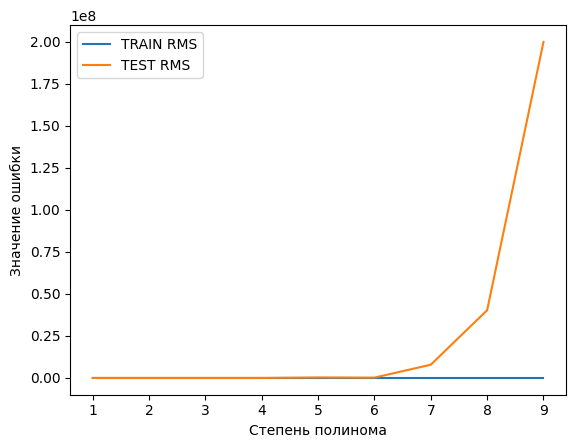

In [59]:
plt.plot(range(1,10), train_rmse_errors, label = 'TRAIN RMS')
plt.plot(range(1,10), test_rmse_errors, label = 'TEST RMS')
plt.xlabel('Степень полинома')
plt.ylabel('Значение ошибки')
plt.legend()

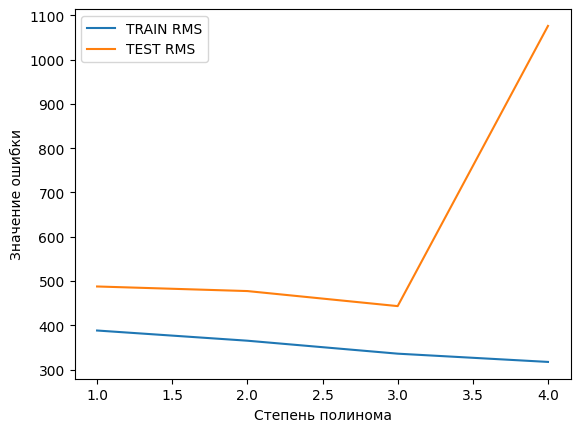

In [61]:
plt.plot(range(1,5), train_rmse_errors[:4], label = 'TRAIN RMS')
plt.plot(range(1,5), test_rmse_errors[:4], label = 'TEST RMS')
plt.xlabel('Степень полинома')
plt.ylabel('Значение ошибки')
plt.legend()

По графику степень - 3, но нужно знать предметную область все-таки, да и 3 на границе, поэтому стоит отступить от границы.

In [62]:
final_poly_converter = PolynomialFeatures(degree=2, include_bias=False)

In [63]:
final_model = LinearRegression()

In [64]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X, y)

LinearRegression()

In [65]:
from joblib import dump, load

In [66]:
dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [68]:
dump(final_poly_converter, 'final_converter.joblib')

['final_converter.joblib']

In [69]:
# применяем сохранненую модель
loaded_converter = load('final_converter.joblib')

In [71]:
loaded_model = load('final_poly_model.joblib')

In [72]:
# Ram = 32gb, CPU_cores = 16, CPU_threads = 16
laptop = [[32,16,16]]

In [76]:
transformed_data = loaded_converter.transform(laptop)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [77]:
loaded_model.predict(transformed_data)

array([2701.49633157])